# Basic usage example
This notebook demostrates the basic use of the of *python* interface of the `py-cmorlite` library. For installation and usage of the *command line interface* refer to the [README of the Gitlab Repository](https://gitlab.dkrz.de/m300765/py-cmorlite).

In this example we are going to standardise data from the Rgional Model (*REMO*) using the *CORDEX* standard. The remo model output is part of the pre defined processing definitions. Hence we are going to use this pre defined processing routine in this example, please refer to the [Advanced usage example](https://nbviewer.jupyter.org/urls/gitlab.dkrz.de/m300765/py-cmorlite/-/raw/master/docs/AdvancedUsageExample.ipynb) to learn how to involve user defined processing routines to process arbitrary data.

In [1]:
# Import all other modules we need for this tutorial
from pathlib import Path
import xarray as xr

In [2]:
from cmorlite import Standard as cs

We will create an instace of the standardisation class using the `from_existing_preprocessor` class method. This will create a Standartisation class taylored around any pre defined model processing method. 

In [3]:
print(cs.from_existing_preprocessor.__doc__)

Create the standardisation according to a pre define pre processor.

            This method returns an standartisation ojbect, which can be used
            to standardise data for model ouptput that fits predefined
            preprocessing routines.

            Valid models are: remo

            Parameters:
             metdata : str, pathlib.Path
                Path to json of toml meta-data file format
            *iput_directories : colection
                Input director(ies) for finding input files
            file_type : str, (default: '.nc')
                Input file types
            glob_pattern : str (default: '*')
                Glob-pattern to be used when searching for files
            out_dir : str, pathlib.Path (default: None)
                Directory where output should be saved to. If None given (default)
                the users SCRATCH directory is taken.
            overwrite : bool (default: False)
                Overwrite existing standardised file
  

We're going to standardise convective precipitation data. Example datasets are saved in the `tests` folder. 
We can use mutiple input files or regular expressions to filter for input direcories.

In [4]:
input_directory = Path(cs.__file__).parent / 'tests' / 'remo_data*'
metafile = Path(cs.__file__).parent / 'tests' / 'euc-0275-evaluation-remo_example.json'

We need to define the nessecary metadata for this run. An example meta datafile can be found in the `docs/euc-0275-evaluation-remo_example.json` file, here is its content:

```json
{
    "institution_id":               "GERICS",
    "contact":                      "gerics-cordex@hzg.de",
    "source_id":                    "GERICS-REMO2015",
    "source":                       "Regional Model version 2015",
    "model_id":                     "GERICS-REMO2015",
    "grid":                         "0.0275 x 0.0275 degree latitude x longitude",
    "grid_label":                   "gn",
    "nominal_resolution":           "3 km",
    "calendar":                     "gregorian",
    "product":                      "EUC-0275",
    "ensemble":                     "r1i1p1",
    "driving_experiment":           "ECMWF-ERAINT, evaluation, r1i1p1",
    "driving_model_id":             "ECMWF-ERAINT",
    "driving_experiment_name":      "evaluation",
    "version_id":                   "v1",
    "experiment_id":                "evaluation",
    "frequency":                    "1hr",
    "creation_date":                "2019-03-22T11:37:39Z",
    "Conventions":                  "CF-1.7",
    "project_id":                   "CORDEX",
    "modeling_realm":               "atmos",
    "initialization_method":        1,
    "physics_version":              1,
    "realization_index":            1,
    "cmor_version":                 "2.9.1",
    "variant_label":                "r1i1p1",
    "mip_era":                      "CMIP6",
    "further_info_url":             "http://www.remo-rcm.de/",
    "contact":                      "gerics-cordex@hzg.de",
    "history":                      "",
    "references":                   "",
    "_DRS_type":                    "cordex",
    "_variable_entry_file":         "CORDEX/CORDEX_??",
    "_control_vocabulary_file":     "CORDEX/CORDEX_CV.json",
    "_AXIS_ENTRY_FILE":             "CORDEX/CORDEX_coordinate.json",
    "_FORMULA_VAR_FILE":            "CORDEX/CORDEX_formula_terms.json",
    "activity_id":                  "CORDEX",
    "tracking_prefix":              "hdl:21.14100"
}
```

With the above information we can create a cmorisation object that findes and standardises all data.

In [5]:
CMOR = cs.from_existing_preprocessor(metafile, input_directory, file_type='', glob_pattern='*c142*',
                                     overwrite=True, model='remo',out_dir=cs.scratch / 'test')

In [6]:
CMOR.files

<generator object get_filenames at 0x2b698f3a07b0>

files are the input files, wrapped in an iterator, that are going to be standardised.

In [7]:
res = CMOR.run(CMOR.files)
res

[PosixPath('/scratch/k/k204230/test/cordex/cordex/EUC-0275/GERICS/ECMWF-ERAINT-GERICS-REMO2015/evaluation/1hr/atmos/1hr/r1i1p1/v20210104/pr/pr_1hr_ECMWF-ERAINT-GERICS-REMO2015_evaluation_r1i1p1_200906100010-200906100010.nc')]

In [8]:
#Sanity check
dset = xr.open_mfdataset(res, combine='by_coords', parallel=True)
dset

<xarray.Dataset>
Dimensions:       (rlat: 401, rlon: 361, time: 3)
Coordinates:
  * time          (time) datetime64[ns] 2009-06-10T17:00:00 ... 2009-06-10T19...
  * rlon          (rlon) float64 -9.524 -9.496 -9.469 ... 0.3212 0.3487 0.3763
  * rlat          (rlat) float64 -5.294 -5.266 -5.239 ... 5.651 5.679 5.706
Data variables:
    rotated_pole  int32 ...
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(3, 401, 361), meta=np.ndarray>
Attributes:
    CDI:                            Climate Data Interface version 1.9.9 (htt...
    Conventions:                    CF-1.6
    history:                        Wed Jan 06 16:29:51 2021: cdo -O -s -f nc...
    tracking_id:                    0c3441eb-c25c-570d-a8ce-cd00e2960f0a
    creation_date:                  2021-01-06T16:29:51Z
    CDO:                            Climate Data Operators version 1.9.9 (htt...
    institution_id:                 GERICS
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    contact:                        gerics-cordex@hzg.de
    experiment_id:                  evaluation
    CORDEX_domain:                  EUC-0275
    project_id:                     CORDEX
    initialization_method:          1
    physics_version:                1
    frequency:                      sampled hourly
    frequency_id:                   1hr
    modeling_realm:                 atmos
    nominal_resolution:             3 km
    title:                          GERICS-REMO2015 model output prepared for...
    grid:                           0.0275 x 0.0275 degree latitude x longitude
    grid_label:                     gn
    calendar:                       gregorian
    driving_experiment:             ECMWF-ERAINT, evaluation, r1i1p1
    driving_model_id:               ECMWF-ERAINT
    driving_experiment_name:        evaluation
    driving_model_ensemble_member:  r1i1p1
    rcm_version_id:                 v1
    cmor_version:                   2.9.1

The standartisation also applies vairalbe conversion using the `pint` library. Let's check if the accumulated precipitation field [*mm*] was converted correctly to a flux unit [*kg/m^2/s*] by plotting the data field:

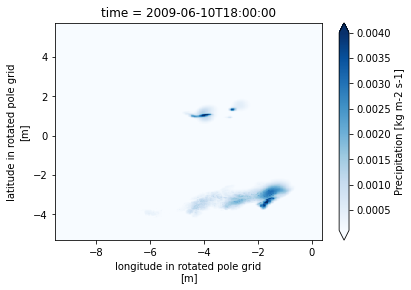

In [9]:
_ = dset['pr'].isel(time=1).plot(cmap='Blues', vmin=0.0001, vmax=0.004)

This looks about right